In [6]:
import numpy as np
import math
from math import sqrt
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
from scipy.stats import norm

In [7]:
#Predicting Gross Profit
rev_mean = 170
rev_stdev = 20
iterations = 1000

In [8]:
rev = np.random.normal(rev_mean, rev_stdev, iterations)
rev

array([188.84744831, 151.29162676, 164.18371102, 171.11997566,
       191.03078529, 147.31052672, 165.77575702, 149.12306745,
       190.72578312, 179.14335749, 163.03102539, 187.92357688,
       211.10952438, 193.86987314, 171.80032394, 173.174984  ,
       185.72577868, 160.94281117, 157.16324425, 129.74730214,
       193.49778437, 158.3301252 , 176.10914161, 147.55434862,
       178.19463809, 166.94937868, 161.50071558, 160.32753206,
       184.71538721, 181.97475014, 182.17714493, 158.38273075,
       144.7378047 , 154.37857955, 189.84594122, 205.12569898,
       184.82163798, 168.9128818 , 193.89560488, 160.72889239,
       185.3380562 , 152.57587101, 185.96921308, 184.6702125 ,
       161.62982208, 179.54474882, 199.4270891 , 158.79327613,
       171.48218561, 183.08552311, 165.8466666 , 163.47768441,
       178.46448981, 151.15284477, 145.04994115, 156.79512386,
       160.56098198, 147.92386716, 140.34988957, 158.7519117 ,
       172.24639884, 188.29178257, 156.87050442, 195.45

In [9]:
max(rev)

245.23101051807183

In [10]:
min(rev)

111.01097611402645

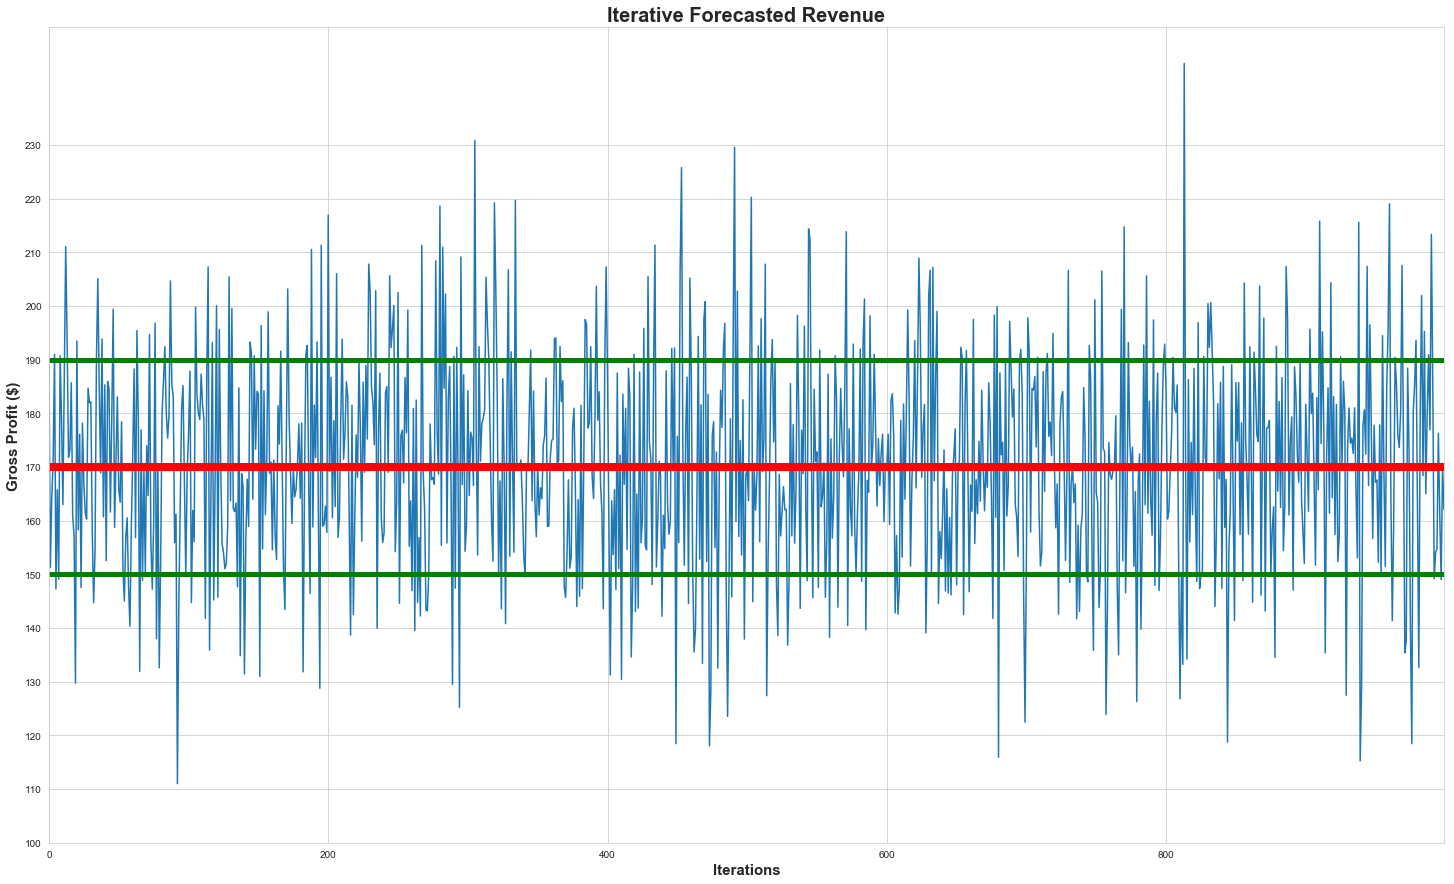

In [11]:
plt.figure(figsize = (25,15))
plt.title('Iterative Forecasted Revenue', fontsize = 20, weight = 'bold')
plt.plot(rev)
plt.yticks(np.arange(100, 240, step = 10))
plt.xlabel('Iterations', fontsize = 15, weight = 'bold')
plt.ylabel('Gross Profit ($)', fontsize = 15, weight = 'bold')
plt.axhline(y=170, linewidth = 8, color = 'r') 
plt.axhline(y = 190, linewidth = 5, color = 'g')
plt.axhline(y = 150, linewidth = 5, color = 'g')
plt.margins(x = 0)
plt.show()

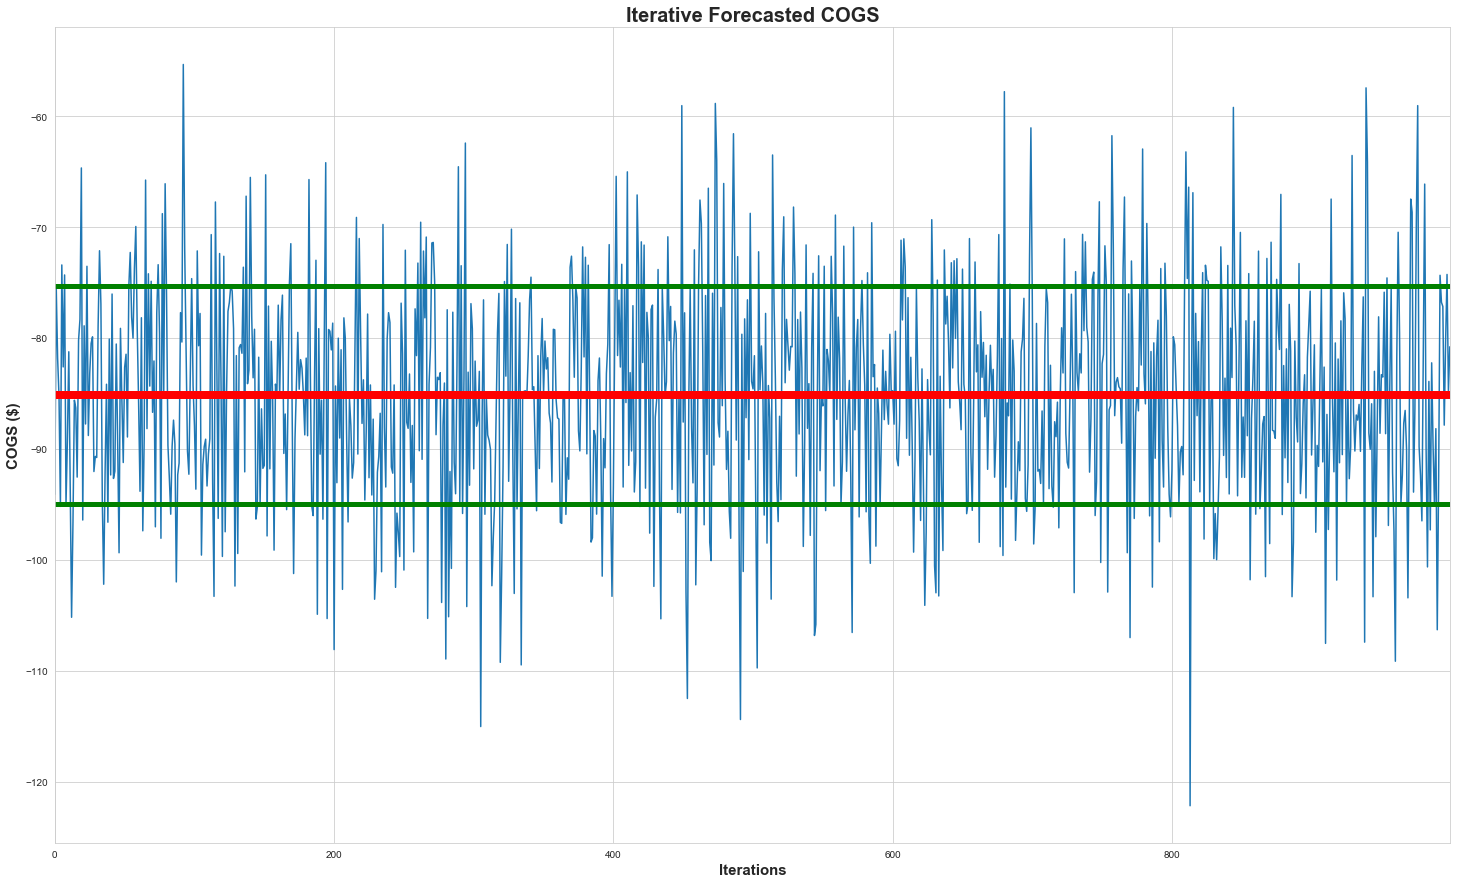

In [12]:
COGS = -(rev*np.random.normal(0.6, 0.1))             #COGS ~ 60% of Revenues [Don't use 0.06 or simulate 1000 times] -> Mean of 0.6, St. Dev of 0.1
plt.figure(figsize = (25,15))
plt.title('Iterative Forecasted COGS', fontsize = 20, weight = 'bold')
plt.plot(COGS)
plt.axhline(y= COGS.mean(), linewidth = 8, color = 'r') 
plt.axhline(y = COGS.mean() + COGS.std(), linewidth = 5, color = 'g')
plt.axhline(y = COGS.mean() - COGS.std(), linewidth = 5, color = 'g')
plt.xlabel('Iterations', fontsize = 15, weight = 'bold')
plt.ylabel('COGS ($)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
plt.show()

In [13]:
COGS.mean()

-85.11814308527438

In [14]:
COGS.std()

9.854258342072303

In [15]:
#Predicting Gross Profit - Part II
gp = rev + COGS
gp

array([ 94.75545689,  75.9115749 ,  82.3802635 ,  85.86058018,
        95.85096068,  73.91403161,  83.17908312,  74.82348592,
        95.69792382,  89.88636511,  81.80189585,  94.29189829,
       105.92560088,  97.27549179,  86.20194944,  86.89169422,
        93.1891385 ,  80.75412055,  78.85769784,  65.10156746,
        97.08879379,  79.44318807,  88.36392721,  74.03637087,
        89.41033887,  83.76795555,  81.03405278,  80.44540018,
        92.6821679 ,  91.30703511,  91.40858803,  79.46958326,
        72.62315132,  77.4604739 ,  95.25645732, 102.92317689,
        92.73547992,  84.75315623,  97.28840286,  80.64678539,
        92.99459618,  76.55595296,  93.31128332,  92.65950119,
        81.09883282,  90.08776587, 100.06386167,  79.67557712,
        86.04232142,  91.8643728 ,  83.21466246,  82.02600998,
        89.54573876,  75.84194013,  72.77976785,  78.67299099,
        80.56253523,  74.22177924,  70.42148586,  79.65482224,
        86.42577047,  94.47664793,  78.71081369,  98.06

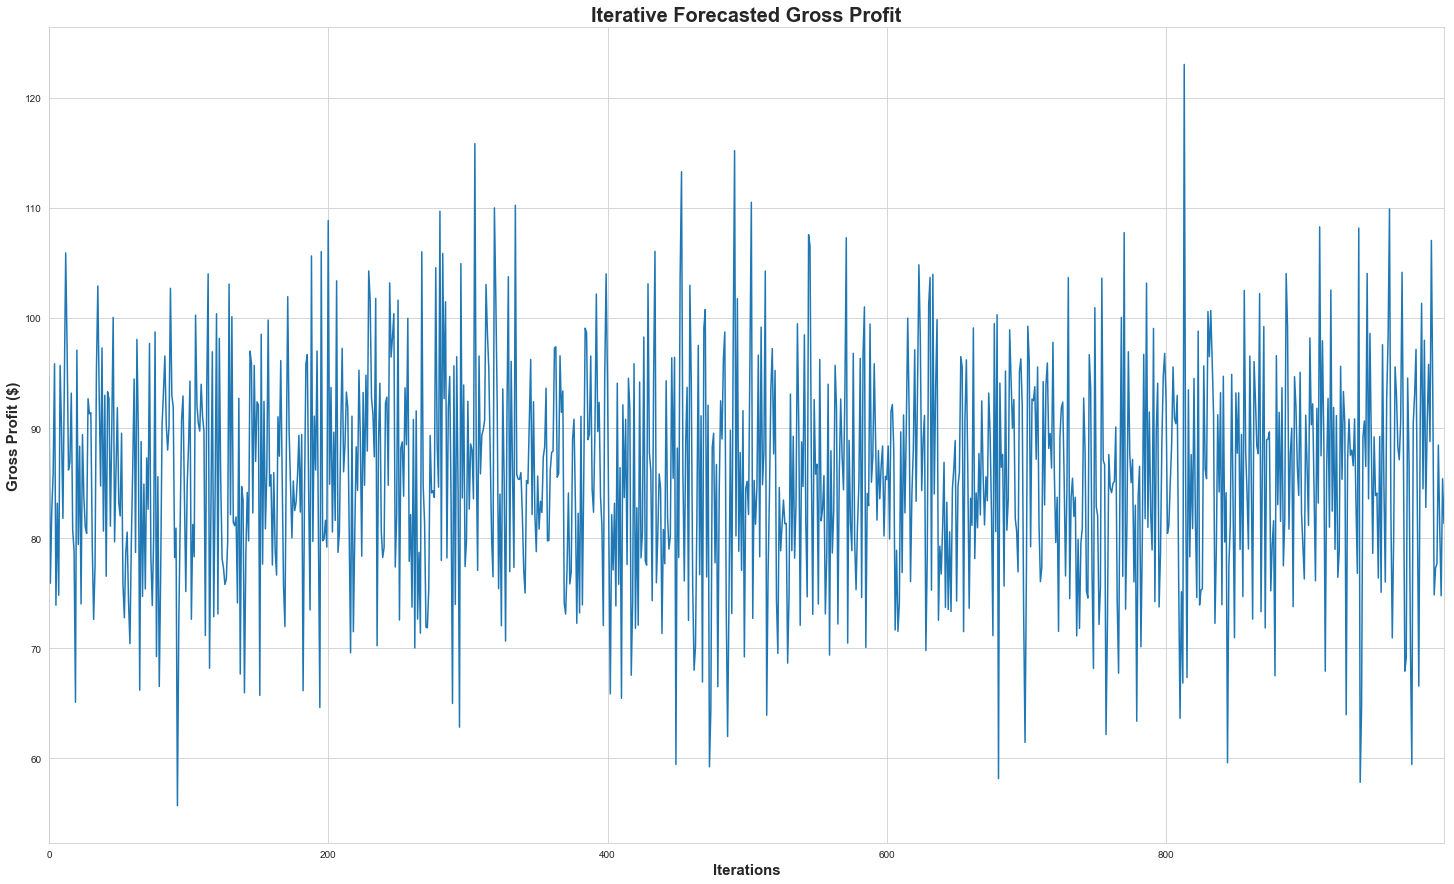

In [16]:
plt.figure(figsize = (25,15))
plt.title('Iterative Forecasted Gross Profit', fontsize = 20, weight = 'bold')
plt.xlabel('Iterations', fontsize = 15, weight = 'bold')
plt.ylabel('Gross Profit ($)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
plt.plot(gp)
plt.show()

In [17]:
max(gp)

123.04628235450986

In [18]:
min(gp)

55.70049188526114

In [19]:
gp.mean()

85.71833178318309

In [20]:
gp.std()

9.92374311075739

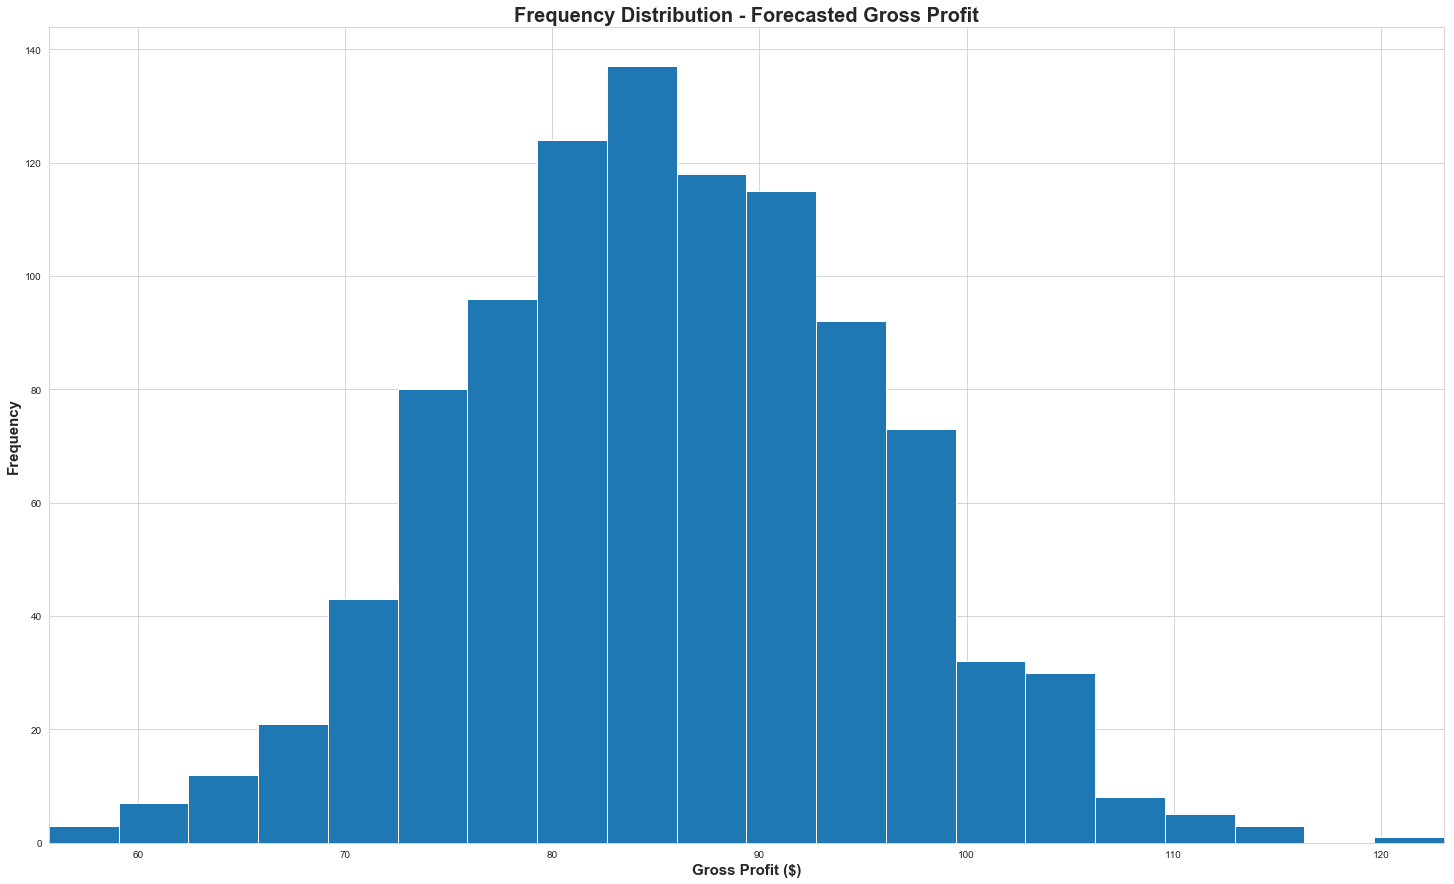

In [21]:
plt.figure(figsize = (25,15))
plt.hist(gp, bins = 20)
plt.title('Frequency Distribution - Forecasted Gross Profit', fontsize = 20, weight = 'bold')
plt.xlabel('Gross Profit ($)', fontsize = 15, weight = 'bold')
plt.ylabel('Frequency', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
plt.show()

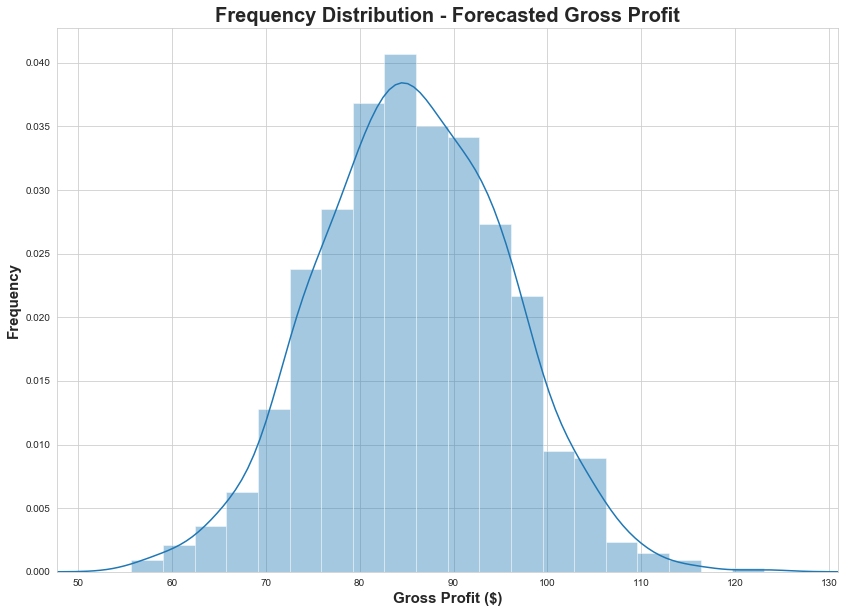

In [22]:
sns.distplot(gp, bins = 20)
plt.title('Frequency Distribution - Forecasted Gross Profit', fontsize = 20, weight = 'bold')
plt.xlabel('Gross Profit ($)', fontsize = 15, weight = 'bold')
plt.ylabel('Frequency', fontsize = 15, weight = 'bold')
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.margins(x = 0)
plt.show()